We need to be able to take a series of observations and check the likelihood of observing those outcomes for all our hypotheses of interest.

Our hypotheses will be a list of probabilities for the bias in the coin--each value represents the chance that the coin will come up "heads".

The measurement noise is simply a fixed value representing the probability that we will observe a different result than the actual one. 

In [71]:
library(ggplot2)

In [88]:
y  <- 0.1
hypos  <- seq(0, 1, 0.01)

likelihood  <- function(obs, hypos, noise) {
    # chance of getting a heads
    p  <- (1-noise)*hypos + noise*(1-hypos)
    
    if (obs) {
      return(p)  
    } else {
        return(1-p)
    }
}


normalize_belief  <- function(belief) {
    return(belief/sum(belief))
}

belief  <- rep(1, length(hypos))

belief  <- normalize_belief(belief)

In [89]:
flips  <- c(T, T, T, T, T, F, T, T)

In [90]:
for (f in flips) {
    l  <- likelihood(f, hypos, 1.0)
    belief  <- belief*l
}
belief  <- normalize_belief(belief)

Warning message in as.data.frame.numeric(hypos, belief):
"'row.names' is not a character vector of length 101 -- omitting it. Will be an error!"

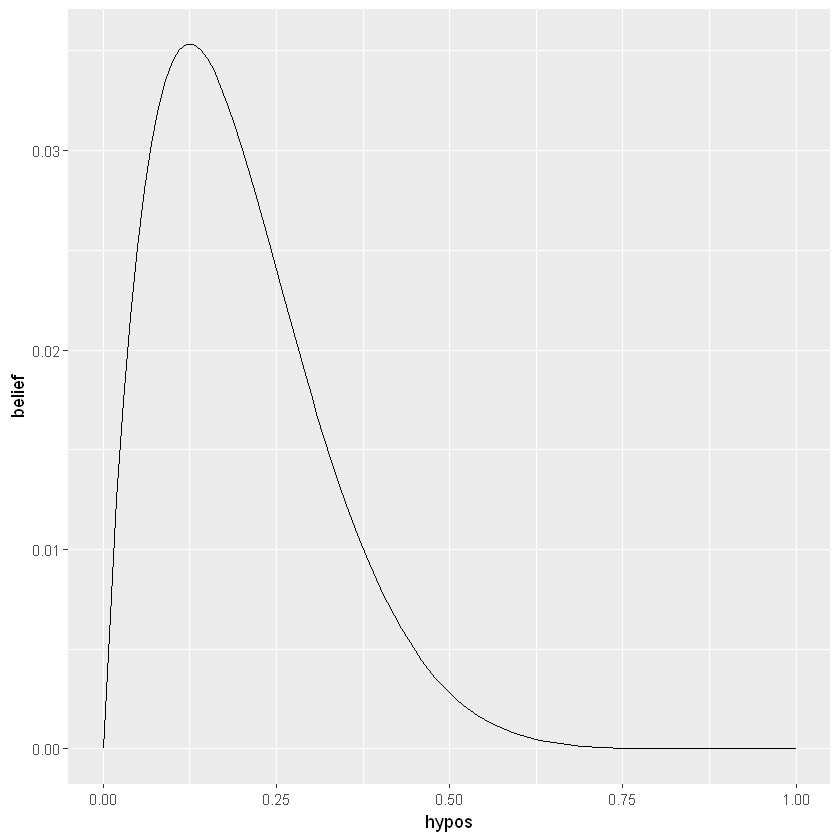

In [92]:
d  <- as.data.frame(hypos, belief)
ggplot(data = d, aes(x = hypos, y = belief)) +
      geom_line()

# plot(l)